# Multicollinearity
Multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. That is one input feature can be represented as linear combination of other features.

>Having a high corellation is a good indicator that the feature might be colinear.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/auto-mpg.csv')
display(data.sample(10))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
366,17.6,6,225.0,85,3465,16.6,81,1,chrysler lebaron salon
239,30.0,4,97.0,67,1985,16.4,77,3,subaru dl
159,14.0,8,351.0,148,4657,13.5,75,1,ford ltd
361,25.4,6,168.0,116,2900,12.6,81,3,toyota cressida
78,21.0,4,120.0,87,2979,19.5,72,2,peugeot 504 (sw)
215,13.0,8,318.0,150,3755,14.0,76,1,dodge d100
169,20.0,6,232.0,100,2914,16.0,75,1,amc gremlin
357,32.9,4,119.0,100,2615,14.8,81,3,datsun 200sx
97,18.0,6,225.0,105,3121,16.5,73,1,plymouth valiant
298,23.0,8,350.0,125,3900,17.4,79,1,cadillac eldorado


In [3]:
data = data.replace('?', np.nan)
data = data.dropna()
data.info()
data['horsepower'] = data['horsepower'].astype(np.float) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [4]:
X = data.drop(columns=['mpg', 'car name', 'origin'])
y = data['mpg']

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scale_all = ColumnTransformer([('std_scaler', StandardScaler(), X.columns)])
X = pd.DataFrame(scale_all.fit_transform(X), columns=X.columns)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

AxesSubplot(0.125,0.125;0.62x0.755)


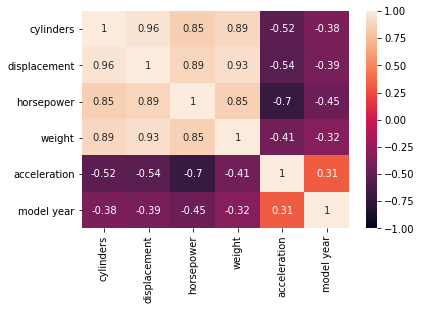

In [7]:
X_corr_mat = X_train.corr()
print(sns.heatmap(X_corr_mat, annot=True, vmin=-1))

**Notice** that weight, cylinders, displacement and horsepower have high correclation with each other. 

### <u>Adjusted R squared vs R sqaured</u>:
Let us first understand what is R-squared:

R-squared or R2 explains the degree to which your input variables explain the variation of your output / predicted variable. So, if R-square is 0.8, it means 80% of the variation in the output variable is explained by the input variables. So, in simple terms, higher the R squared, the more variation is explained by your input variables and hence better is your model.

However, the problem with R-squared is that it will either stay the same or increase with addition of more variables, even if they do not have any relationship with the output variables. This is where “*Adjusted R square*” comes to help. Adjusted R-square penalizes you for adding variables which do not improve your existing model.

Hence, if you are building Linear regression on multiple variable, it is always suggested that you use Adjusted R-squared to judge goodness of model. In case you only have one input variable, R-square and Adjusted R squared would be exactly same.

Typically, the more non-significant variables you add into the model, the gap in R-squared and Adjusted R-squared increases.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def adjusted_r2(r2, labels, features):
    ar2 = 1 - ((1-r2)*(len(labels) -1))/(len(labels)- features.shape[1] - 1)
    return ar2

def get_scores(X, y):
    reg = LinearRegression(normalize=True)
    reg.fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y_pred, y)
    print("R2 Score :", r2)
    ar2 = adjusted_r2(r2, y, X)
    print("Adjusted R2 Score :", ar2)
    print("Difference between R2 and AR2 :", abs(ar2-r2))

In [9]:
print("Training Set")
get_scores(X_train, y_train)
print("\nTesting Set")
get_scores(X_test, y_test)

Training Set
R2 Score : 0.7593217628600555
Adjusted R2 Score : 0.7539132631490455
Difference between R2 and AR2 : 0.005408499711009984

Testing Set
R2 Score : 0.8022726166593686
Adjusted R2 Score : 0.7915846499923074
Difference between R2 and AR2 : 0.010687966667061177


<u>**Note**</u>: We earlier saw increased correlation between weight, cylinders, displacement and horsepower. Let's try the score of our model after dropping weight, cylinders and displacement.

In [10]:
X_train = X_train.drop(columns=['weight', 'cylinders', 'displacement'])
X_test = X_test.drop(columns=['weight', 'cylinders', 'displacement'])

AxesSubplot(0.125,0.125;0.62x0.755)


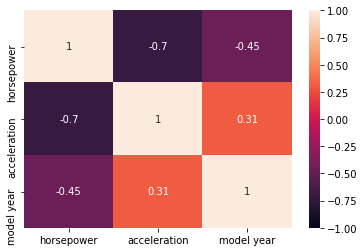

In [11]:
X_corr_mat = X_train.corr()
print(sns.heatmap(X_corr_mat, annot=True, vmin=-1))

**Notice** that the correlation between the features dropped 

In [12]:
print("Training Set")
get_scores(X_train, y_train)
print("\nTesting Set")
get_scores(X_test, y_test)

Training Set
R2 Score : 0.5960875003414822
Adjusted R2 Score : 0.5915995836786097
Difference between R2 and AR2 : 0.004487916662872515

Testing Set
R2 Score : 0.6157356342006313
Adjusted R2 Score : 0.6056234140480163
Difference between R2 and AR2 : 0.010112220152614926


<u>**Notice**</u>: that the difference between R2 and AR2 is lower when we have dropped highly correlated features.